In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from math import sqrt
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [2]:
co2 = pd.read_csv('C:/Users/monal/Desktop/Data Science/environmental/Air and Climate/CO2_Emissions.csv')
cli_dis = pd.read_csv('C:/Users/monal/Desktop/Data Science/environmental/Natural Disasters/Climatological disasters.csv')
geo_dis = pd.read_csv('C:/Users/monal/Desktop/Data Science/environmental/Natural Disasters/Geophysical disasters.csv')
meteo_dis = pd.read_csv('C:/Users/monal/Desktop/Data Science/environmental/Natural Disasters/Meteorological disasters.csv')

In [3]:
co2.head(10)

,Country ID,Country,"Time Series - CO₂ total emissions without LULUCF, in 1000 t",Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,"CO2 emissions, latest year",% change since 1990,"CO2 emissions \nper capita, \nlatest year"
0,NaN,NaN,1990,1991,1992,1993,1994,1995,1996,1997,...,2013,2014,2015,2016,2017,2018,Latest Year,1000 t,%,kg
1,4.0,Afghanistan,...,...,...,...,...,...,...,...,...,"9,851.00",...,...,...,...,...,2013,9851.00,...,0.31
2,8.0,Albania,"3,101.66","5,166.70","3,311.06","3,235.47","3,500.49","3,477.42","3,341.56","3,426.64",...,...,...,...,...,...,...,2009,5942.57,91.59,2.00
3,12.0,Algeria,...,...,...,...,"63,705.00",...,...,...,...,...,...,...,...,...,...,2000,71593.26,...,2.31
4,24.0,Angola,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,2005,27809.00,...,1.43
5,28.0,Antigua and Barbuda,288.14,...,...,...,...,...,...,...,...,...,...,...,...,...,...,2000,371.88,29.06,4.89
6,32.0,Argentina,"1,00,867.50",...,...,...,"1,17,595.97",...,...,"1,25,563.93",...,...,...,...,...,...,...,2012,188265.15,86.65,4.51
7,51.0,Armenia,"21,615.96",...,...,...,...,...,...,...,...,...,...,...,...,...,...,2010,4456.99,-79.38,1.55
8,36.0,Australia,"2,78,424.66","2,79,872.66","2,84,912.44","2,89,235.19","2,94,014.96","3,05,410.17","3,12,361.59","3,20,795.09",...,"3,97,943.18","3,94,116.89","4,01,554.76","4,11,031.53","4,15,097.43","4,15,953.95",2018,415953.95,49.40,16.71
9,40.0,Austria,"62,124.70","65,725.53","60,204.07","60,635.42","61,002.44","64,065.26","67,421.59","67,232.78",...,"67,745.69","64,084.43","66,283.24","67,112.27","69,628.86","66,719.68",2018,66719.68,7.40,7.50


In [4]:
co2.columns

Index(['Country ID', 'Country',
       'Time Series - CO₂ total emissions  without LULUCF, in 1000 t',
       'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7',
       'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28',
       'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31',
       'CO2 emissions, latest year', '% change since 1990',
       'CO2 emissions \nper capita, \nlatest year'],
      dtype='object')

In [5]:
co2['Country ID'][0] = 'Country ID'
co2['Country'][0] = 'Country'
co2.columns = co2.iloc[0]
co2.head()

C:\Users\monal\AppData\Local\Temp/ipykernel_12516/1731414717.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  co2['Country ID'][0] = 'Country ID'
C:\Users\monal\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Country ID,Country,1990,1991,1992,1993,1994,1995,1996,1997,...,2013,2014,2015,2016,2017,2018,Latest Year,1000 t,%,kg
0,Country ID,Country,1990,1991,1992,1993,1994,1995,1996,1997,...,2013,2014,2015,2016,2017,2018,Latest Year,1000 t,%,kg
1,4.0,Afghanistan,...,...,...,...,...,...,...,...,...,"9,851.00",...,...,...,...,...,2013,9851.00,...,0.31
2,8.0,Albania,"3,101.66","5,166.70","3,311.06","3,235.47","3,500.49","3,477.42","3,341.56","3,426.64",...,...,...,...,...,...,...,2009,5942.57,91.59,2.00
3,12.0,Algeria,...,...,...,...,"63,705.00",...,...,...,...,...,...,...,...,...,...,2000,71593.26,...,2.31
4,24.0,Angola,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,2005,27809.00,...,1.43


In [6]:
co2.drop(index=co2.index[0], axis=0, inplace=True)
co2.reset_index(drop=True, inplace=True)
co2.replace(to_replace = '...', value = 0, inplace = True)
co2.head()

,Country ID,Country,1990,1991,1992,1993,1994,1995,1996,1997,...,2013,2014,2015,2016,2017,2018,Latest Year,1000 t,%,kg
0,4.0,Afghanistan,0,0,0,0,0,0,0,0,...,"9,851.00",0,0,0,0,0,2013,9851.00,0,0.31
1,8.0,Albania,"3,101.66","5,166.70","3,311.06","3,235.47","3,500.49","3,477.42","3,341.56","3,426.64",...,0,0,0,0,0,0,2009,5942.57,91.59,2.00
2,12.0,Algeria,0,0,0,0,"63,705.00",0,0,0,...,0,0,0,0,0,0,2000,71593.26,0,2.31
3,24.0,Angola,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2005,27809.00,0,1.43
4,28.0,Antigua and Barbuda,288.14,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2000,371.88,29.06,4.89


In [7]:
co2.isnull().values.any()

False

In [8]:
nineties = ['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999']
twos = ['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009']
twotens = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']

'''
co2[nineties] = co2[nineties].astype('|S')
co2[twos] = co2[twos].astype('|S')
co2[twotens] = co2[twotens].astype('|S')
'''
#o2[nineties] =(co2[nineties].split()).apply(lambda x: float(x[0].replace(',', '')))
#o2[twos] =(co2[twos].split()).apply(lambda x: float(x[0].replace(',', '')))
#o2[twotens] =(co2[twotens].split()).apply(lambda x: float(x[0].replace(',', '')))

co2.replace(',','', regex=True, inplace=True)

co2[nineties] = co2[nineties].astype(float, errors = 'raise')
co2[twos] = co2[twos].astype(float, errors = 'raise')
co2[twotens] = co2[twotens].astype(float, errors = 'raise')

co2['CO2 1990-1999'] = co2[nineties].sum(axis = 1)
co2['CO2 2000-2009'] = co2[twos].sum(axis=1)
co2['CO2 2010-2018'] = co2[twotens].sum(axis=1)

co2.dtypes

0
Country ID       float64
Country           object
1990             float64
1991             float64
1992             float64
1993             float64
1994             float64
1995             float64
1996             float64
1997             float64
1998             float64
1999             float64
2000             float64
2001             float64
2002             float64
2003             float64
2004             float64
2005             float64
2006             float64
2007             float64
2008             float64
2009             float64
2010             float64
2011             float64
2012             float64
2013             float64
2014             float64
2015             float64
2016             float64
2017             float64
2018             float64
Latest Year       object
1000 t            object
%                 object
kg                object
CO2 1990-1999    float64
CO2 2000-2009    float64
CO2 2010-2018    float64
dtype: object

In [9]:
co2 = co2.drop(['Latest Year', '1000 t', '%', 'kg'], 1)
co2.rename(columns={'Country ID': 'CountryID', 'Country': 'Countries or areas'}, inplace=True)
co2 = co2.set_index(['CountryID', 'Countries or areas'])

co2 = co2.T
co2['Global CO2'] = co2.sum(axis = 1)

co2.head()
#CO2 totals in tons x 1000

C:\Users\monal\AppData\Local\Temp/ipykernel_12516/2026189251.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  co2 = co2.drop(['Latest Year', '1000 t', '%', 'kg'], 1)


CountryID,4.0,8.0,12.0,24.0,28.0,32.0,51.0,36.0,40.0,31.0,...,840.0,858.0,860.0,548.0,862.0,704.0,887.0,894.0,716.0,Global CO2
Countries or areas,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe,
0,,,,,,,,,,,,,,,,,,,,,
1990,0.0,3101.66,0.0,0.0,288.14,100867.50,21615.96,278424.66,62124.70,55893.73,...,5128300.62,3897.33,113286.32,0.00,0.0,0.00,0.0,0.00,0.00,17734973.88
1991,0.0,5166.70,0.0,0.0,0.00,0.00,0.00,279872.66,65725.53,51901.46,...,5078889.58,0.00,113301.74,0.00,0.0,0.00,0.0,0.00,0.00,16419320.95
1992,0.0,3311.06,0.0,0.0,0.00,0.00,0.00,284912.44,60204.07,44546.68,...,5182706.72,0.00,106305.61,0.00,0.0,0.00,0.0,0.00,0.00,15908917.16
1993,0.0,3235.47,0.0,0.0,0.00,0.00,0.00,289235.19,60635.42,39136.42,...,5283437.60,0.00,106809.00,0.00,0.0,0.00,0.0,0.00,0.00,15765213.49
1994,0.0,3500.49,63705.0,0.0,0.00,117595.97,0.00,294014.96,61002.44,34272.68,...,5377032.71,4267.90,101370.90,55.15,0.0,25382.82,0.0,2595.35,17088.48,21243579.12


In [10]:
#co2 = co2.T
#co2.reset_index(inplace=True)
co2.index.name = 'Year'

co2.head()

CountryID,4.0,8.0,12.0,24.0,28.0,32.0,51.0,36.0,40.0,31.0,...,840.0,858.0,860.0,548.0,862.0,704.0,887.0,894.0,716.0,Global CO2
Countries or areas,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe,
Year,,,,,,,,,,,,,,,,,,,,,
1990,0.0,3101.66,0.0,0.0,288.14,100867.50,21615.96,278424.66,62124.70,55893.73,...,5128300.62,3897.33,113286.32,0.00,0.0,0.00,0.0,0.00,0.00,17734973.88
1991,0.0,5166.70,0.0,0.0,0.00,0.00,0.00,279872.66,65725.53,51901.46,...,5078889.58,0.00,113301.74,0.00,0.0,0.00,0.0,0.00,0.00,16419320.95
1992,0.0,3311.06,0.0,0.0,0.00,0.00,0.00,284912.44,60204.07,44546.68,...,5182706.72,0.00,106305.61,0.00,0.0,0.00,0.0,0.00,0.00,15908917.16
1993,0.0,3235.47,0.0,0.0,0.00,0.00,0.00,289235.19,60635.42,39136.42,...,5283437.60,0.00,106809.00,0.00,0.0,0.00,0.0,0.00,0.00,15765213.49
1994,0.0,3500.49,63705.0,0.0,0.00,117595.97,0.00,294014.96,61002.44,34272.68,...,5377032.71,4267.90,101370.90,55.15,0.0,25382.82,0.0,2595.35,17088.48,21243579.12


In [11]:
#co2 = co2.T
#co2.head()

In [12]:
cli_dis.head(10)

,CountryID,Countries or areas,Occurrence 1990-1999,Occurrence 2000-2009,Occurrence 2010-2019,Total deaths 1990-1999,Total deaths 2000-2009,Total deaths 2010-2019,Persons affected 1990-1999,Persons affected 2000-2009,Persons affected 2010-2019
0,4,Afghanistan,3,3,2,0,37,0,48000,4760000,12350000
1,8,Albania,1,1,...,0,0,...,3200000,75,...
2,12,Algeria,2,1,...,22,8,...,0,0,...
3,24,Angola,4,2,2,0,58,0,2585000,25000,3253900
4,660,Anguilla,1,...,...,0,...,...,0,...,...
5,28,Antigua and Barbuda,1,...,...,0,...,...,75000,...,...
6,32,Argentina,3,4,1,24,8,0,152752,0,0
7,51,Armenia,...,1,...,...,0,...,...,297000,...
8,36,Australia,27,12,13,890,202,41,7150201,17809,12628
9,31,Azerbaijan,...,1,...,...,0,...,...,0,...


In [13]:
cli_dis.columns

Index(['CountryID', 'Countries or areas', 'Occurrence 1990-1999',
       'Occurrence 2000-2009', 'Occurrence 2010-2019',
       'Total deaths 1990-1999', 'Total deaths 2000-2009',
       'Total deaths 2010-2019', 'Persons affected 1990-1999',
       'Persons affected 2000-2009', 'Persons affected 2010-2019'],
      dtype='object')

In [14]:
cli_dis.replace(to_replace = '...', value = 0, inplace = True)
headers = ['Occurrence 1990-1999','Occurrence 2000-2009', 'Occurrence 2010-2019','Total deaths 1990-1999', 'Total deaths 2000-2009','Total deaths 2010-2019', 'Persons affected 1990-1999','Persons affected 2000-2009', 'Persons affected 2010-2019']
cli_dis[headers] = cli_dis[headers].astype(float, errors = 'raise')
cli_dis.dtypes

CountryID                       int64
Countries or areas             object
Occurrence 1990-1999          float64
Occurrence 2000-2009          float64
Occurrence 2010-2019          float64
Total deaths 1990-1999        float64
Total deaths 2000-2009        float64
Total deaths 2010-2019        float64
Persons affected 1990-1999    float64
Persons affected 2000-2009    float64
Persons affected 2010-2019    float64
dtype: object

In [15]:
cli_dis.loc['Total',:]= cli_dis[headers].sum(axis=0)
print(cli_dis.loc['Total'])

CountryID                              NaN
Countries or areas                     NaN
Occurrence 1990-1999                 607.0
Occurrence 2000-2009                 313.0
Occurrence 2010-2019                 258.0
Total deaths 1990-1999          10512979.0
Total deaths 2000-2009              1776.0
Total deaths 2010-2019             20968.0
Persons affected 1990-1999    1306860486.0
Persons affected 2000-2009     757756274.0
Persons affected 2010-2019     668559106.0
Name: Total, dtype: object


In [16]:
print(cli_dis['CountryID'])

0          4.0
1          8.0
2         12.0
3         24.0
4        660.0
         ...  
149      862.0
150      704.0
151      894.0
152      716.0
Total      NaN
Name: CountryID, Length: 154, dtype: float64


In [17]:
cli_dis = cli_dis.set_index(['CountryID', 'Countries or areas'])
cli_dis = cli_dis.T
cli_dis.head()

CountryID,4.0,8.0,12.0,24.0,660.0,28.0,32.0,51.0,36.0,31.0,...,804.0,834.0,840.0,858.0,860.0,862.0,704.0,894.0,716.0,NaN
Countries or areas,Afghanistan,Albania,Algeria,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Australia,Azerbaijan,...,Ukraine,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Venezuela (Bolivarian Republic of),Viet Nam,Zambia,Zimbabwe,NaN
Occurrence 1990-1999,3.0,1.0,2.0,4.0,1.0,1.0,3.0,0.0,27.0,0.0,...,0.0,7.0,29.0,1.0,0.0,0.0,3.0,4.0,3.0,607.0
Occurrence 2000-2009,3.0,1.0,1.0,2.0,0.0,0.0,4.0,1.0,12.0,1.0,...,0.0,3.0,39.0,0.0,1.0,1.0,3.0,1.0,2.0,313.0
Occurrence 2010-2019,2.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,13.0,0.0,...,1.0,1.0,34.0,1.0,0.0,0.0,2.0,0.0,3.0,258.0
Total deaths 1990-1999,0.0,0.0,22.0,0.0,0.0,0.0,24.0,0.0,890.0,0.0,...,0.0,0.0,1180.0,0.0,0.0,0.0,0.0,0.0,0.0,10512979.0
Total deaths 2000-2009,37.0,0.0,8.0,58.0,0.0,0.0,8.0,0.0,202.0,0.0,...,0.0,0.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,1776.0


In [18]:
cli_dis['Global Cli Dis'] = cli_dis.sum(axis = 1)
cli_dis.head()

CountryID,4.0,8.0,12.0,24.0,660.0,28.0,32.0,51.0,36.0,31.0,...,834.0,840.0,858.0,860.0,862.0,704.0,894.0,716.0,NaN,Global Cli Dis
Countries or areas,Afghanistan,Albania,Algeria,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Australia,Azerbaijan,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Venezuela (Bolivarian Republic of),Viet Nam,Zambia,Zimbabwe,NaN,
Occurrence 1990-1999,3.0,1.0,2.0,4.0,1.0,1.0,3.0,0.0,27.0,0.0,...,7.0,29.0,1.0,0.0,0.0,3.0,4.0,3.0,607.0,1214.0
Occurrence 2000-2009,3.0,1.0,1.0,2.0,0.0,0.0,4.0,1.0,12.0,1.0,...,3.0,39.0,0.0,1.0,1.0,3.0,1.0,2.0,313.0,626.0
Occurrence 2010-2019,2.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,13.0,0.0,...,1.0,34.0,1.0,0.0,0.0,2.0,0.0,3.0,258.0,516.0
Total deaths 1990-1999,0.0,0.0,22.0,0.0,0.0,0.0,24.0,0.0,890.0,0.0,...,0.0,1180.0,0.0,0.0,0.0,0.0,0.0,0.0,10512979.0,21025958.0
Total deaths 2000-2009,37.0,0.0,8.0,58.0,0.0,0.0,8.0,0.0,202.0,0.0,...,0.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,1776.0,3552.0


In [19]:
geo_dis.head(10)

,CountryID,Countries or areas,Occurrence 1990-1999,Occurrence 2000-2009,Occurrence 2010-2019,Total deaths 1990-1999,Total deaths 2000-2009,Total deaths 2010-2019,Persons affected 1990-1999,Persons affected 2000-2009,Persons affected 2010-2019
0,4,Afghanistan,10,11,5,7426,1236,217,352293,107947,97970
1,8,Albania,1,1,3,0,0,51,2100,150,14007
2,12,Algeria,3,5,1,193,2279,6,30214,211095,420
3,16,American Samoa,...,1,...,...,34,...,...,2500,...
4,32,Argentina,1,2,2,0,0,0,63200,727,3000
5,51,Armenia,1,...,...,0,...,...,15000,...,...
6,36,Australia,1,...,...,0,...,...,5025,...,...
7,40,Austria,1,...,...,0,...,...,0,...,...
8,31,Azerbaijan,2,1,2,2,31,0,709178,3294,22499
9,50,Bangladesh,2,3,2,29,4,9,15400,3525,270


In [20]:
geo_dis.replace(to_replace = '...', value = 0, inplace = True)
headers = ['Occurrence 1990-1999','Occurrence 2000-2009', 'Occurrence 2010-2019','Total deaths 1990-1999', 'Total deaths 2000-2009','Total deaths 2010-2019', 'Persons affected 1990-1999','Persons affected 2000-2009', 'Persons affected 2010-2019']
geo_dis[headers] = geo_dis[headers].astype(float, errors = 'raise')
geo_dis['CountryID'] = geo_dis['CountryID'].astype(float, errors = 'raise')
geo_dis.dtypes

CountryID                     float64
Countries or areas             object
Occurrence 1990-1999          float64
Occurrence 2000-2009          float64
Occurrence 2010-2019          float64
Total deaths 1990-1999        float64
Total deaths 2000-2009        float64
Total deaths 2010-2019        float64
Persons affected 1990-1999    float64
Persons affected 2000-2009    float64
Persons affected 2010-2019    float64
dtype: object

In [21]:
geo_dis = geo_dis.set_index(['CountryID', 'Countries or areas'])

geo_dis.head()

,,Occurrence 1990-1999,Occurrence 2000-2009,Occurrence 2010-2019,Total deaths 1990-1999,Total deaths 2000-2009,Total deaths 2010-2019,Persons affected 1990-1999,Persons affected 2000-2009,Persons affected 2010-2019
CountryID,Countries or areas,,,,,,,,,
4.0,Afghanistan,10.0,11.0,5.0,7426.0,1236.0,217.0,352293.0,107947.0,97970.0
8.0,Albania,1.0,1.0,3.0,0.0,0.0,51.0,2100.0,150.0,14007.0
12.0,Algeria,3.0,5.0,1.0,193.0,2279.0,6.0,30214.0,211095.0,420.0
16.0,American Samoa,0.0,1.0,0.0,0.0,34.0,0.0,0.0,2500.0,0.0
32.0,Argentina,1.0,2.0,2.0,0.0,0.0,0.0,63200.0,727.0,3000.0


In [22]:
geo_dis = geo_dis.T
geo_dis['Global Geo Dis'] = geo_dis.sum(axis = 1)
geo_dis.head()

CountryID,4.0,8.0,12.0,16.0,32.0,51.0,36.0,40.0,31.0,50.0,...,800.0,826.0,834.0,840.0,860.0,548.0,862.0,876.0,887.0,Global Geo Dis
Countries or areas,Afghanistan,Albania,Algeria,American Samoa,Argentina,Armenia,Australia,Austria,Azerbaijan,Bangladesh,...,Uganda,United Kingdom of Great Britain and Northern Ireland,United Republic of Tanzania,United States of America,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Wallis and Futuna Islands,Yemen,
Occurrence 1990-1999,10.0,1.0,3.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0,...,3.0,1.0,0.0,9.0,2.0,6.0,1.0,1.0,1.0,318.0
Occurrence 2000-2009,11.0,1.0,5.0,1.0,2.0,0.0,0.0,0.0,1.0,3.0,...,0.0,1.0,5.0,5.0,0.0,7.0,0.0,0.0,1.0,354.0
Occurrence 2010-2019,5.0,3.0,1.0,0.0,2.0,0.0,0.0,0.0,2.0,2.0,...,1.0,0.0,1.0,5.0,1.0,2.0,0.0,0.0,0.0,305.0
Total deaths 1990-1999,7426.0,0.0,193.0,0.0,0.0,0.0,0.0,0.0,2.0,29.0,...,7.0,0.0,0.0,65.0,10.0,112.0,80.0,5.0,10.0,102611.0
Total deaths 2000-2009,1236.0,0.0,2279.0,34.0,0.0,0.0,0.0,0.0,31.0,4.0,...,0.0,0.0,15.0,3.0,0.0,0.0,0.0,0.0,6.0,454147.0


In [23]:
meteo_dis.head(10)

,CountryID,Countries or areas,Occurrence 1990-1999,Occurrence 2000-2009,Occurrence 2010-2019,Total deaths 1990-1999,Total deaths 2000-2009,Total deaths 2010-2019,Persons affected 1990-1999,Persons affected 2000-2009,Persons affected 2010-2019
0,4,Afghanistan,3,7,5,234,1996,196,200,393340,9128
1,8,Albania,...,4,2,...,11,11,...,525150,230000
2,12,Algeria,...,4,2,...,67,8,...,15,250025
3,16,American Samoa,...,2,...,...,0,...,...,23060,...
4,660,Anguilla,1,...,1,0,...,4,150,...,15000
5,28,Antigua and Barbuda,5,,2,6,0,1,11684,25800,6400
6,32,Argentina,4,13,6,21,100,75,43000,12756,15242
7,51,Armenia,...,...,4,...,...,0,...,...,97600
8,36,Australia,30,27,15,74,359,172,8539068,44851,126377
9,40,Austria,8,10,5,3,359,21,0,300,330


In [24]:
meteo_dis['Occurrence 2000-2009'].replace(to_replace = '   ', value = 0, inplace = True)
meteo_dis['Occurrence 2000-2009'].head(25)

0       7
1       4
2       4
3       2
4     ...
5       0
6      13
7     ...
8      27
9      10
10    ...
11      8
12     49
13      2
14      3
15      8
16      7
17      1
18      1
19      1
20      5
21      3
22      1
23      7
24    ...
Name: Occurrence 2000-2009, dtype: object

In [25]:
meteo_dis.replace(to_replace = '...', value = 0, inplace = True)
meteo_dis.replace(to_replace = '', value = 0, inplace = True)
headers = ['Occurrence 1990-1999','Occurrence 2000-2009', 'Occurrence 2010-2019','Total deaths 1990-1999', 'Total deaths 2000-2009','Total deaths 2010-2019', 'Persons affected 1990-1999','Persons affected 2000-2009', 'Persons affected 2010-2019']
meteo_dis[headers] = meteo_dis[headers].astype(float, errors = 'raise')
meteo_dis.dtypes

CountryID                       int64
Countries or areas             object
Occurrence 1990-1999          float64
Occurrence 2000-2009          float64
Occurrence 2010-2019          float64
Total deaths 1990-1999        float64
Total deaths 2000-2009        float64
Total deaths 2010-2019        float64
Persons affected 1990-1999    float64
Persons affected 2000-2009    float64
Persons affected 2010-2019    float64
dtype: object

In [26]:
meteo_dis['CountryID'] = meteo_dis['CountryID'].astype(float, errors = 'raise')
meteo_dis = meteo_dis.set_index(['CountryID', 'Countries or areas'])

meteo_dis.head()

,,Occurrence 1990-1999,Occurrence 2000-2009,Occurrence 2010-2019,Total deaths 1990-1999,Total deaths 2000-2009,Total deaths 2010-2019,Persons affected 1990-1999,Persons affected 2000-2009,Persons affected 2010-2019
CountryID,Countries or areas,,,,,,,,,
4.0,Afghanistan,3.0,7.0,5.0,234.0,1996.0,196.0,200.0,393340.0,9128.0
8.0,Albania,0.0,4.0,2.0,0.0,11.0,11.0,0.0,525150.0,230000.0
12.0,Algeria,0.0,4.0,2.0,0.0,67.0,8.0,0.0,15.0,250025.0
16.0,American Samoa,0.0,2.0,0.0,0.0,0.0,0.0,0.0,23060.0,0.0
660.0,Anguilla,1.0,0.0,1.0,0.0,0.0,4.0,150.0,0.0,15000.0


In [27]:
meteo_dis = meteo_dis.T
meteo_dis.head()

CountryID,4.0,8.0,12.0,16.0,660.0,28.0,32.0,51.0,36.0,40.0,...,834.0,840.0,850.0,858.0,548.0,862.0,704.0,876.0,887.0,716.0
Countries or areas,Afghanistan,Albania,Algeria,American Samoa,Anguilla,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Republic of Tanzania,United States of America,United States Virgin Islands,Uruguay,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Wallis and Futuna Islands,Yemen,Zimbabwe
Occurrence 1990-1999,3.0,0.0,0.0,0.0,1.0,5.0,4.0,0.0,30.0,8.0,...,1.0,173.0,4.0,3.0,5.0,1.0,25.0,0.0,0.0,0.0
Occurrence 2000-2009,7.0,4.0,4.0,2.0,0.0,0.0,13.0,0.0,27.0,10.0,...,3.0,136.0,1.0,6.0,3.0,1.0,33.0,0.0,2.0,2.0
Occurrence 2010-2019,5.0,2.0,2.0,0.0,1.0,2.0,6.0,4.0,15.0,5.0,...,2.0,150.0,2.0,1.0,5.0,1.0,31.0,1.0,4.0,4.0
Total deaths 1990-1999,234.0,0.0,0.0,0.0,0.0,6.0,21.0,0.0,74.0,3.0,...,4.0,3005.0,10.0,2.0,38.0,100.0,5541.0,0.0,0.0,0.0
Total deaths 2000-2009,1996.0,11.0,67.0,0.0,0.0,0.0,100.0,0.0,359.0,359.0,...,0.0,3703.0,0.0,16.0,4.0,5.0,1319.0,0.0,30.0,8.0


In [28]:
meteo_dis['Global Meteo Dis'] = meteo_dis.sum(axis = 1)

In [29]:
meteo_dis.head(11)

CountryID,4.0,8.0,12.0,16.0,660.0,28.0,32.0,51.0,36.0,40.0,...,840.0,850.0,858.0,548.0,862.0,704.0,876.0,887.0,716.0,Global Meteo Dis
Countries or areas,Afghanistan,Albania,Algeria,American Samoa,Anguilla,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United States of America,United States Virgin Islands,Uruguay,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Wallis and Futuna Islands,Yemen,Zimbabwe,
Occurrence 1990-1999,3.0,0.0,0.0,0.0,1.0,5.0,4.0,0.0,30.0,8.0,...,173.0,4.0,3.0,5.0,1.0,25.0,0.0,0.0,0.0,973.0
Occurrence 2000-2009,7.0,4.0,4.0,2.0,0.0,0.0,13.0,0.0,27.0,10.0,...,136.0,1.0,6.0,3.0,1.0,33.0,0.0,2.0,2.0,1236.0
Occurrence 2010-2019,5.0,2.0,2.0,0.0,1.0,2.0,6.0,4.0,15.0,5.0,...,150.0,2.0,1.0,5.0,1.0,31.0,1.0,4.0,4.0,1177.0
Total deaths 1990-1999,234.0,0.0,0.0,0.0,0.0,6.0,21.0,0.0,74.0,3.0,...,3005.0,10.0,2.0,38.0,100.0,5541.0,0.0,0.0,0.0,220215.0
Total deaths 2000-2009,1996.0,11.0,67.0,0.0,0.0,0.0,100.0,0.0,359.0,359.0,...,3703.0,0.0,16.0,4.0,5.0,1319.0,0.0,30.0,8.0,262561.0
Total deaths 2010-2019,196.0,11.0,8.0,0.0,4.0,1.0,75.0,0.0,172.0,21.0,...,2459.0,7.0,4.0,23.0,8.0,508.0,0.0,75.0,920.0,101579.0
Persons affected 1990-1999,200.0,0.0,0.0,0.0,150.0,11684.0,43000.0,0.0,8539068.0,0.0,...,3638747.0,10000.0,3500.0,15565.0,5900.0,5405384.0,0.0,0.0,0.0,230740551.0
Persons affected 2000-2009,393340.0,525150.0,15.0,23060.0,0.0,25800.0,12756.0,0.0,44851.0,300.0,...,8692834.0,0.0,4012.0,54808.0,1730.0,8207385.0,0.0,0.0,0.0,479652473.0
Persons affected 2010-2019,9128.0,230000.0,250025.0,0.0,15000.0,6400.0,15242.0,97600.0,126377.0,330.0,...,88053581.0,0.0,0.0,242570.0,0.0,8601814.0,1252.0,140939.0,385684.0,334304763.0


In [30]:
#print(co2['Global CO2'].loc['CO2 1990-1999'])

In [31]:
dates = {'1990', '1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018'}

In [32]:
'''
co2_grouped = co2.copy()
co2_grouped = co2_grouped.drop(dates, axis = 0)
co2_grouped = co2_grouped.rename({'Occurrence 1990-1999': 'CO2 Emissions 1990-1999', 'Occurrence 2000-2009': 'CO2 Emissions 2000-2009', 'Occurrence 2010-2019': 'CO2 Emissions 2010-2019'})
co2_grouped = co2_grouped.T
co2_grouped.reset_index(inplace=True)
co2_grouped.head()
'''

"\nco2_grouped = co2.copy()\nco2_grouped = co2_grouped.drop(dates, axis = 0)\nco2_grouped = co2_grouped.rename({'Occurrence 1990-1999': 'CO2 Emissions 1990-1999', 'Occurrence 2000-2009': 'CO2 Emissions 2000-2009', 'Occurrence 2010-2019': 'CO2 Emissions 2010-2019'})\nco2_grouped = co2_grouped.T\nco2_grouped.reset_index(inplace=True)\nco2_grouped.head()\n"

In [33]:
tds = {'Total deaths 1990-1999', 'Total deaths 2000-2009', 'Total deaths 2010-2019', 'Persons affected 1990-1999', 'Persons affected 2000-2009', 'Persons affected 2010-2019'}

cli_dis_grouped = cli_dis.copy()
cli_dis_grouped = cli_dis_grouped.drop(tds, axis = 0)
cli_dis_grouped = cli_dis_grouped.rename({'Occurrence 1990-1999': 'Climatological Disasters 1990-1999', 'Occurrence 2000-2009': 'Climatological Disasters 2000-2009', 'Occurrence 2010-2019': 'Climatological Disasters 2010-2019'})
cli_dis_grouped = cli_dis_grouped.T
#cli_dis_grouped.reset_index(inplace=True)
cli_dis_grouped.head()

,,Climatological Disasters 1990-1999,Climatological Disasters 2000-2009,Climatological Disasters 2010-2019
CountryID,Countries or areas,,,
4.0,Afghanistan,3.0,3.0,2.0
8.0,Albania,1.0,1.0,0.0
12.0,Algeria,2.0,1.0,0.0
24.0,Angola,4.0,2.0,2.0
660.0,Anguilla,1.0,0.0,0.0


In [34]:
geo_dis_grouped = geo_dis.copy()
geo_dis_grouped = geo_dis_grouped.drop(tds, axis = 0)
geo_dis_grouped = geo_dis_grouped.rename({'Occurrence 1990-1999': 'Geological Disasters 1990-1999', 'Occurrence 2000-2009': 'Geological Disasters 2000-2009', 'Occurrence 2010-2019': 'Geological Disasters 2010-2019'})
geo_dis_grouped = geo_dis_grouped.T
#geo_dis_grouped.reset_index(inplace=True)
geo_dis_grouped.head()

,,Geological Disasters 1990-1999,Geological Disasters 2000-2009,Geological Disasters 2010-2019
CountryID,Countries or areas,,,
4.0,Afghanistan,10.0,11.0,5.0
8.0,Albania,1.0,1.0,3.0
12.0,Algeria,3.0,5.0,1.0
16.0,American Samoa,0.0,1.0,0.0
32.0,Argentina,1.0,2.0,2.0


In [35]:
meteo_dis_grouped = meteo_dis.copy()
meteo_dis_grouped = meteo_dis_grouped.drop(tds, axis = 0)
meteo_dis_grouped = meteo_dis_grouped.rename({'Occurrence 1990-1999': 'Meteorological Disasters 1990-1999', 'Occurrence 2000-2009': 'Meteorological Disasters 2000-2009', 'Occurrence 2010-2019': 'Meteorological Disasters 2010-2019'})
meteo_dis_grouped = meteo_dis_grouped.T
#meteo_dis_grouped.reset_index(inplace=True)
meteo_dis_grouped.head()

,,Meteorological Disasters 1990-1999,Meteorological Disasters 2000-2009,Meteorological Disasters 2010-2019
CountryID,Countries or areas,,,
4.0,Afghanistan,3.0,7.0,5.0
8.0,Albania,0.0,4.0,2.0
12.0,Algeria,0.0,4.0,2.0
16.0,American Samoa,0.0,2.0,0.0
660.0,Anguilla,1.0,0.0,1.0


In [36]:
co2.head()

CountryID,4.0,8.0,12.0,24.0,28.0,32.0,51.0,36.0,40.0,31.0,...,840.0,858.0,860.0,548.0,862.0,704.0,887.0,894.0,716.0,Global CO2
Countries or areas,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe,
Year,,,,,,,,,,,,,,,,,,,,,
1990,0.0,3101.66,0.0,0.0,288.14,100867.50,21615.96,278424.66,62124.70,55893.73,...,5128300.62,3897.33,113286.32,0.00,0.0,0.00,0.0,0.00,0.00,17734973.88
1991,0.0,5166.70,0.0,0.0,0.00,0.00,0.00,279872.66,65725.53,51901.46,...,5078889.58,0.00,113301.74,0.00,0.0,0.00,0.0,0.00,0.00,16419320.95
1992,0.0,3311.06,0.0,0.0,0.00,0.00,0.00,284912.44,60204.07,44546.68,...,5182706.72,0.00,106305.61,0.00,0.0,0.00,0.0,0.00,0.00,15908917.16
1993,0.0,3235.47,0.0,0.0,0.00,0.00,0.00,289235.19,60635.42,39136.42,...,5283437.60,0.00,106809.00,0.00,0.0,0.00,0.0,0.00,0.00,15765213.49
1994,0.0,3500.49,63705.0,0.0,0.00,117595.97,0.00,294014.96,61002.44,34272.68,...,5377032.71,4267.90,101370.90,55.15,0.0,25382.82,0.0,2595.35,17088.48,21243579.12


In [37]:
co2 = co2.reset_index()
co2.tail()

CountryID,Year,4.0,8.0,12.0,24.0,28.0,32.0,51.0,36.0,40.0,...,840.0,858.0,860.0,548.0,862.0,704.0,887.0,894.0,716.0,Global CO2
Countries or areas,,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe,
27,2017,0.0,0.00,0.00,0.0,0.00,0.00,0.00,415097.43,69628.86,...,5253606.13,6530.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,1.381015e+07
28,2018,0.0,0.00,0.00,0.0,0.00,0.00,0.00,415953.95,66719.68,...,5424881.50,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,1.391482e+07
29,CO2 1990-1999,0.0,37178.39,63705.00,0.0,288.14,344027.40,21615.96,3043775.05,640849.66,...,54401241.42,14076.10,1052424.88,55.15,114126.0,25382.82,10514.96,2595.35,17088.48,1.663547e+08
30,CO2 2000-2009,3222.2,48335.45,71593.26,44126.0,371.88,128323.87,7373.52,3813922.19,734848.59,...,59673686.25,29881.24,1067819.09,69.59,0.0,55905.72,17548.00,1685.89,35864.23,1.769212e+08
31,CO2 2010-2018,9851.0,0.00,0.00,0.0,0.00,370204.64,4456.99,3651879.54,610693.35,...,49089854.63,35572.50,312381.57,0.00,0.0,303006.08,45652.94,0.00,0.00,1.707501e+08


In [38]:
nums = list(range(0, 29))

co2dates = co2.iloc[nums]
co2dates.Year = pd.to_datetime(co2dates.Year, format="%Y-%m")
co2dates.Year


C:\Users\monal\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


0    1990-01-01
1    1991-01-01
2    1992-01-01
3    1993-01-01
4    1994-01-01
5    1995-01-01
6    1996-01-01
7    1997-01-01
8    1998-01-01
9    1999-01-01
10   2000-01-01
11   2001-01-01
12   2002-01-01
13   2003-01-01
14   2004-01-01
15   2005-01-01
16   2006-01-01
17   2007-01-01
18   2008-01-01
19   2009-01-01
20   2010-01-01
21   2011-01-01
22   2012-01-01
23   2013-01-01
24   2014-01-01
25   2015-01-01
26   2016-01-01
27   2017-01-01
28   2018-01-01
Name: Year, dtype: datetime64[ns]

In [39]:
co2dates.columns = co2dates.columns.get_level_values('Countries or areas')
co2dates.rename(columns = {'':'Year'}, inplace = True)
co2dates.set_index('Year', inplace=True)


C:\Users\monal\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [40]:
co2dates['Global CO2'] = co2dates.sum(axis = 1)
co2dates.tail()

C:\Users\monal\AppData\Local\Temp/ipykernel_12516/63429524.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  co2dates['Global CO2'] = co2dates.sum(axis = 1)


Countries or areas,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe,Global CO2
Year,,,,,,,,,,,,,,,,,,,,,
"(2014-01-01 00:00:00, 25714748.19)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,394116.89,64084.43,0.0,...,5561719.22,6824.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25714748.19
"(2015-01-01 00:00:00, 15067078.14)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,401554.76,66283.24,0.0,...,5412432.19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15067078.14
"(2016-01-01 00:00:00, 14586515.969999999)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,411031.53,67112.27,0.0,...,5292267.56,6863.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14586515.97
"(2017-01-01 00:00:00, 13810145.81)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,415097.43,69628.86,0.0,...,5253606.13,6530.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13810145.81
"(2018-01-01 00:00:00, 13914824.59)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,415953.95,66719.68,0.0,...,5424881.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13914824.59


<AxesSubplot:xlabel='Year'>

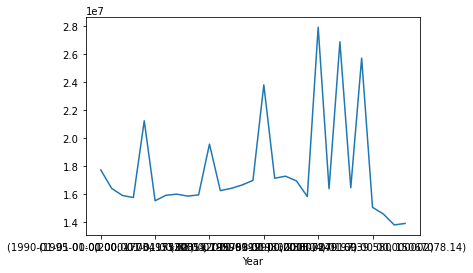

In [41]:
co2dates['Global CO2'].plot()

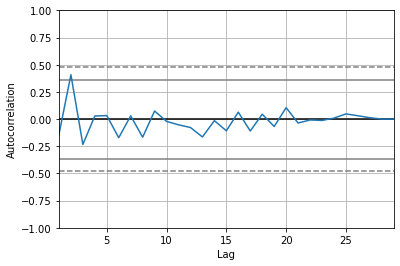

In [42]:
autocorrelation_plot(co2dates['Global CO2'])
plt.show()

                               SARIMAX Results                                
Dep. Variable:             Global CO2   No. Observations:                   29
Model:                 ARIMA(4, 1, 0)   Log Likelihood                -467.322
Date:                Sat, 30 Apr 2022   AIC                            944.645
Time:                        23:28:40   BIC                            951.306
Sample:                             0   HQIC                           946.681
                                 - 29                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6346      0.171     -3.709      0.000      -0.970      -0.299
ar.L2         -0.1411      0.273     -0.516      0.606      -0.677       0.394
ar.L3         -0.1436      0.206     -0.698      0.4

C:\Users\monal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\monal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\monal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


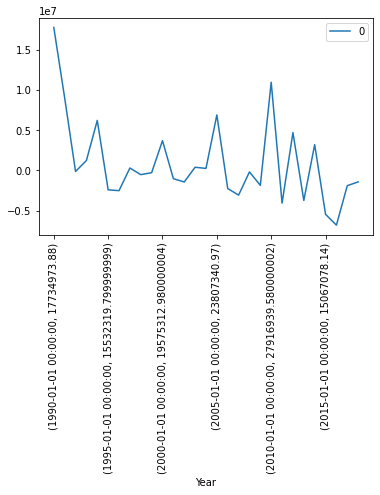

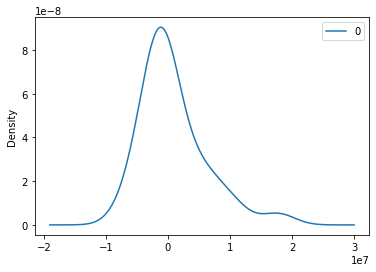

                  0
count  2.900000e+01
mean   8.819783e+05
std    5.248627e+06
min   -6.790074e+06
25%   -2.245948e+06
50%   -2.813825e+05
75%    3.201343e+06
max    1.773497e+07


In [43]:
model = ARIMA(co2dates['Global CO2'], order=(4,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.xticks(rotation=90)
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

predicted=23610059.640920, expected=16396992.750000
predicted=18872989.577939, expected=26878779.840000
predicted=21373229.949734, expected=16464055.120000
predicted=22102166.383480, expected=25714748.190000
predicted=20477875.571941, expected=15067078.140000
predicted=22649804.827757, expected=14586515.970000


C:\Users\monal\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


predicted=16701649.035380, expected=13810145.810000
predicted=15767482.951121, expected=13914824.590000
Test RMSE: 5693837.090


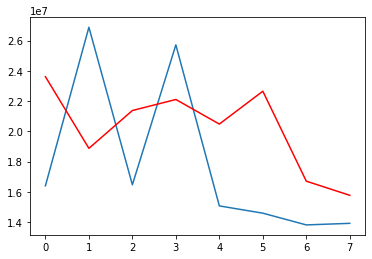

In [44]:
X = co2dates['Global CO2'].values
size = int(len(X) * 0.75)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(4,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [ ]:
#based on the model, it appears global CO2 emissions are likely to remain relatively stable over the next 
#5 years, and begin to decrease beyond that.  I could theoretically use these predicted values to
# then predict climate-based natural disasters given previous decades of data.